In [1]:
from __future__ import absolute_import, division, print_function

import matplotlib.pyplot as plt
import numpy as np
import pyeit.mesh as mesh
import os
from matplotlib.patches import Circle
from src.util import create_trajectory
from matplotlib import cm
from matplotlib.colors import Normalize

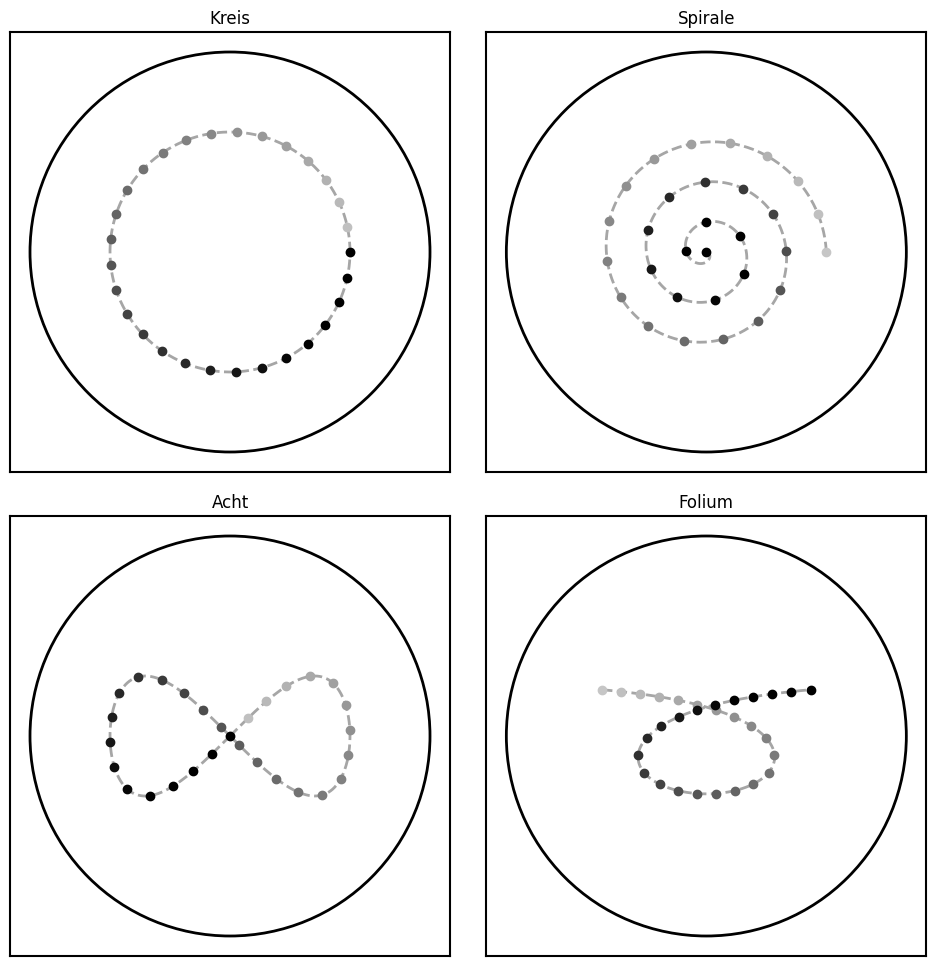

In [10]:
def create_figure_with_trajectories(trajectories, Nsteps, radius, path_radius):
    """
    Create a figure showing trajectories with example points, circles, and frames
    
    Parameters:
    trajectories (list): List of trajectory types to plot
    Nsteps (int): Number of points per trajectory
    radius (float): Radius of the circles around points
    path_radius (float): Radius of the trajectory path
    """
    # Create 2x2 subplot layout with uniform spacing
    fig = plt.figure(figsize=(12, 12))  # Make figure square
    gs = plt.GridSpec(2, 2, figure=fig, wspace=0.05, hspace=0.1)  # Uniform small spacing
    axes = [fig.add_subplot(gs[i]) for i in range(4)]
    
    # Find global plot limits
    all_coords = []
    for traj in trajectories:
        points = create_trajectory(traj, path_radius, Nsteps)
        all_coords.append(points)
    
    all_points = np.vstack(all_coords)
    margin = 0.1
    global_min_x = min(np.min(all_points[:, 0]) - margin, -1.1)
    global_max_x = max(np.max(all_points[:, 0]) + margin, 1.1)
    global_min_y = min(np.min(all_points[:, 1]) - margin, -1.1)
    global_max_y = max(np.max(all_points[:, 1]) + margin, 1.1)
    
    # Plot each trajectory
    for i, traj in enumerate(trajectories):
        points = create_trajectory(traj, path_radius, Nsteps)
        ax = axes[i]
        
        # Plot trajectory path
        ax.plot(points[:, 0], points[:, 1], '--', color='grey', alpha=0.7, linewidth=2)
        
        # Plot example points with circles
        num_example_points = 30
        indices = np.linspace(0, len(points) - 1, num_example_points, dtype=int)
        
        # Create color gradient
        cmap = cm.Greys
        norm = Normalize(vmin=0.0, vmax=0.9)
        colors = cmap(norm(np.linspace(0.3, 1.0, num_example_points)))
        
        # Plot points and circles
        for j, idx in enumerate(indices):
            ax.plot(points[idx, 0], points[idx, 1], 'o', color=colors[j], markersize=6)
            circle = Circle((points[idx, 0], points[idx, 1]), radius=radius, 
                          fill=False, color=colors[j], alpha=0.8)
            ax.add_patch(circle)
        
        # Add unit circle
        unit_circle = Circle((0, 0), radius=1, fill=False, color='black', 
                           linewidth=2, linestyle='-')
        ax.add_patch(unit_circle)
        
        # Show all spines (frames)
        for spine in ax.spines.values():
            spine.set_visible(True)
            spine.set_linewidth(1.5)  # Make frames slightly thicker
            spine.set_color('black')  # Set frame color to black
        
        # Set axis properties
        ax.set_aspect('equal')
        ax.set_title(f'{traj}')
        
        # Remove tick labels and ticks
        ax.set_xticks([])
        ax.set_yticks([])
        
        # Set axis limits
        ax.set_xlim(global_min_x, global_max_x)
        ax.set_ylim(global_min_y, global_max_y)
        
    return fig

# Example usage:
import os
# Create 'Abbildung' directory if it doesn't exist
if not os.path.exists('Abbildungen'):
    os.makedirs('Abbildungen')

trajectories = ["Kreis", "Spirale", "Acht", "Folium"]
Nsteps = 2000
radius = 0.0
path_radius = 0.6

fig = create_figure_with_trajectories(trajectories, Nsteps, radius, path_radius)
# Save in 'Abbildungen' directory
save_path = os.path.join('Abbildungen', 'trajectory_visualization.pdf')
plt.savefig(save_path, format='pdf', dpi=300, bbox_inches='tight')
plt.show()

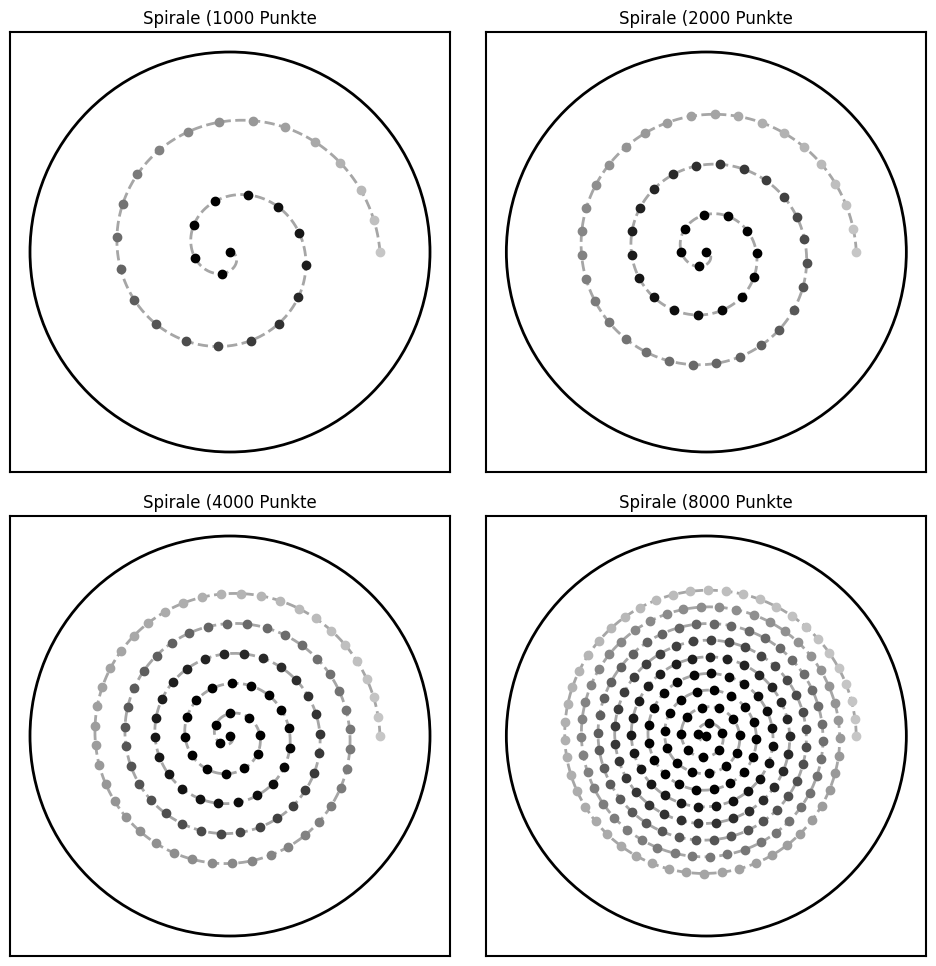

In [12]:
def create_spiral_resolution_comparison(point_counts=[1000, 2000, 4000, 6000], path_radius=0.6):
    """
    Create a figure showing spiral trajectories with different point densities
    
    Parameters:
    point_counts (list): List of point counts for different trajectories
    path_radius (float): Radius of the trajectory path
    """
    # Create 2x2 subplot layout with uniform spacing
    fig = plt.figure(figsize=(12, 12))  # Make figure square
    gs = plt.GridSpec(2, 2, figure=fig, wspace=0.05, hspace=0.1)  # Uniform small spacing
    axes = [fig.add_subplot(gs[i]) for i in range(4)]
    
    # Find global plot limits using the highest resolution spiral
    points_max = create_trajectory("Spirale", path_radius, max(point_counts))
    margin = 0.1
    global_min_x = min(np.min(points_max[:, 0]) - margin, -1.1)
    global_max_x = max(np.max(points_max[:, 0]) + margin, 1.1)
    global_min_y = min(np.min(points_max[:, 1]) - margin, -1.1)
    global_max_y = max(np.max(points_max[:, 1]) + margin, 1.1)
    
    # Plot each spiral with different resolution
    for i, n_points in enumerate(point_counts):
        points = create_trajectory("Spirale", path_radius, n_points)
        ax = axes[i]
        
        # Plot trajectory path
        ax.plot(points[:, 0], points[:, 1], '--', color='grey', alpha=0.7, linewidth=2)
        
        # Calculate number of example points (scales with total points)
        num_example_points = 30 * (n_points // 1000)
        indices = np.linspace(0, len(points) - 1, num_example_points, dtype=int)
        
        # Create color gradient
        cmap = cm.Greys
        norm = Normalize(vmin=0.0, vmax=0.9)
        colors = cmap(norm(np.linspace(0.3, 1.0, num_example_points)))
        
        # Plot points
        for j, idx in enumerate(indices):
            ax.plot(points[idx, 0], points[idx, 1], 'o', color=colors[j], markersize=6)
        
        # Add unit circle
        unit_circle = Circle((0, 0), radius=1, fill=False, color='black', 
                           linewidth=2, linestyle='-')
        ax.add_patch(unit_circle)
        
        # Show all spines (frames)
        for spine in ax.spines.values():
            spine.set_visible(True)
            spine.set_linewidth(1.5)
            spine.set_color('black')
        
        # Set axis properties
        ax.set_aspect('equal')
        ax.set_title(f'Spirale ({n_points} Punkte')
        
        # Remove tick labels and ticks
        ax.set_xticks([])
        ax.set_yticks([])
        
        # Set axis limits
        ax.set_xlim(global_min_x, global_max_x)
        ax.set_ylim(global_min_y, global_max_y)
        
    return fig

# Example usage:
import os
# Create 'Abbildungen' directory if it doesn't exist
if not os.path.exists('Abbildungen'):
    os.makedirs('Abbildungen')

point_counts = [1000, 2000, 4000, 8000]
path_radius = 0.75
fig = create_spiral_resolution_comparison(point_counts, path_radius)

# Save in 'Abbildungen' directory
save_path = os.path.join('Abbildungen', 'spiral_resolution_comparison.pdf')
plt.savefig(save_path, format='pdf', dpi=300, bbox_inches='tight')
plt.show()

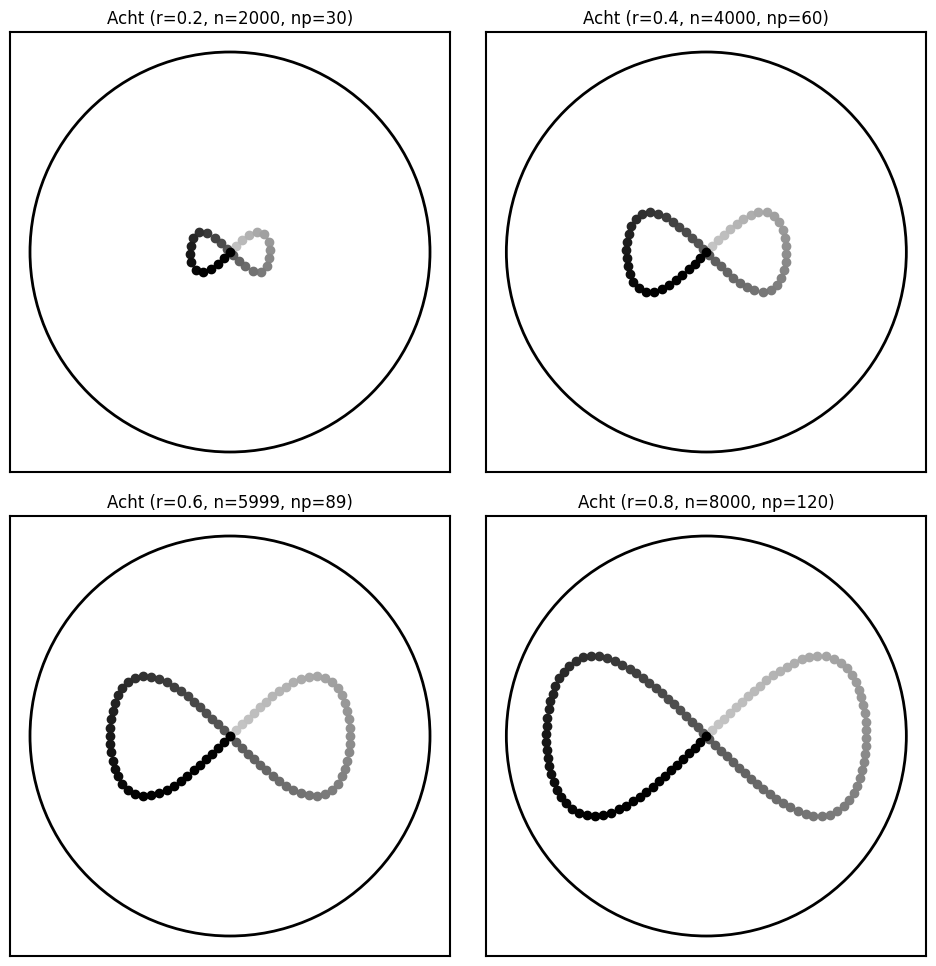

In [14]:
def create_eight_radius_comparison(radii=[0.2, 0.4, 0.6, 0.8], base_points=2000):
    """
    Create a figure showing figure-eight trajectories with different radii and scaled point counts
    
    Parameters:
    radii (list): List of radii for different trajectories
    base_points (int): Number of points for the smallest figure-eight (radius = 0.2)
    """
    # Create 2x2 subplot layout with uniform spacing
    fig = plt.figure(figsize=(12, 12))
    gs = plt.GridSpec(2, 2, figure=fig, wspace=0.05, hspace=0.1)
    axes = [fig.add_subplot(gs[i]) for i in range(4)]
    
    # Calculate reference length for the smallest figure-eight
    ref_points = create_trajectory("Acht", min(radii), base_points)
    dx = np.diff(ref_points[:, 0])
    dy = np.diff(ref_points[:, 1])
    ref_length = np.sum(np.sqrt(dx**2 + dy**2))
    
    # Find global plot limits using the largest radius
    points_max = create_trajectory("Acht", max(radii), base_points)
    margin = 0.1
    global_min_x = min(np.min(points_max[:, 0]) - margin, -1.1)
    global_max_x = max(np.max(points_max[:, 0]) + margin, 1.1)
    global_min_y = min(np.min(points_max[:, 1]) - margin, -1.1)
    global_max_y = max(np.max(points_max[:, 1]) + margin, 1.1)
    
    # Plot each figure-eight with different radius
    for i, radius in enumerate(radii):
        # Scale number of points based on radius ratio
        scale_factor = radius / min(radii)
        scaled_points = int(base_points * scale_factor)
        points = create_trajectory("Acht", radius, scaled_points)
        
        ax = axes[i]
        
        # Plot trajectory path
        ax.plot(points[:, 0], points[:, 1], '--', color='grey', alpha=0.7, linewidth=2)
        
        # Scale example points with radius
        base_example_points = 30  # Base number of example points for smallest radius
        num_example_points = int(base_example_points * scale_factor)
        indices = np.linspace(0, len(points) - 1, num_example_points, dtype=int)
        
        # Create color gradient
        cmap = cm.Greys
        norm = Normalize(vmin=0.0, vmax=0.9)
        colors = cmap(norm(np.linspace(0.3, 1.0, num_example_points)))
        
        # Plot points
        for j, idx in enumerate(indices):
            ax.plot(points[idx, 0], points[idx, 1], 'o', color=colors[j], markersize=6)
        
        # Add unit circle
        unit_circle = Circle((0, 0), radius=1, fill=False, color='black', 
                           linewidth=2, linestyle='-')
        ax.add_patch(unit_circle)
        
        # Show all spines (frames)
        for spine in ax.spines.values():
            spine.set_visible(True)
            spine.set_linewidth(1.5)
            spine.set_color('black')
        
        # Set axis properties
        ax.set_aspect('equal')
        ax.set_title(f'Acht (r={radius:.1f}, n={scaled_points}, np={num_example_points})')
        
        # Remove tick labels and ticks
        ax.set_xticks([])
        ax.set_yticks([])
        
        # Set axis limits
        ax.set_xlim(global_min_x, global_max_x)
        ax.set_ylim(global_min_y, global_max_y)
        
    return fig

# Example usage:
import os
# Create 'Abbildungen' directory if it doesn't exist
if not os.path.exists('Abbildungen'):
    os.makedirs('Abbildungen')

radii = [0.2, 0.4, 0.6, 0.8]
base_points = 2000  # Points for smallest figure-eight
fig = create_eight_radius_comparison(radii, base_points)

# Save in 'Abbildungen' directory
save_path = os.path.join('Abbildungen', 'eight_radius_comparison.pdf')
plt.savefig(save_path, format='pdf', dpi=300, bbox_inches='tight')
plt.show()

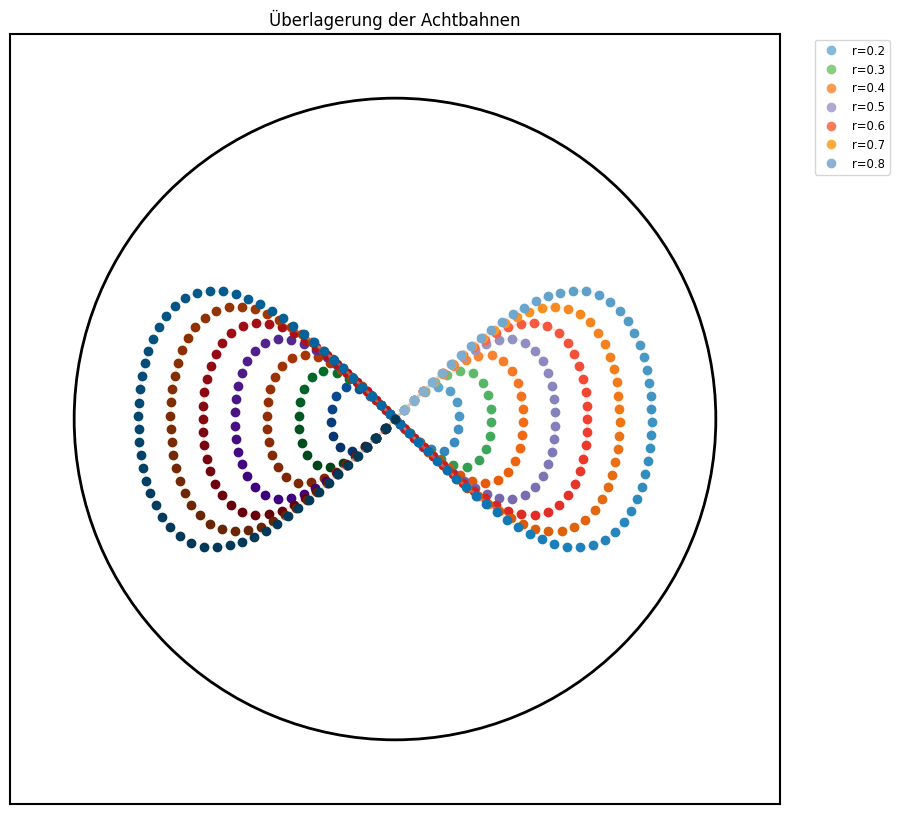

In [20]:
def create_eight_overlay_comparison(radii=[0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8], base_points=2000):
    """
    Create a figure showing all figure-eight trajectories overlaid with different colormaps
    
    Parameters:
    radii (list): List of radii for different trajectories
    base_points (int): Number of points for the smallest figure-eight
    """
    # Create single plot
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    
    # Create a list of colormaps for all trajectories
    colormaps = [
        cm.Blues, cm.Greens, cm.Oranges, cm.Purples, 
        cm.Reds, cm.YlOrBr, cm.PuBu
    ]
    
    # Ensure we have enough colormaps
    if len(radii) > len(colormaps):
        print(f"Warning: Not enough unique colormaps for {len(radii)} trajectories. Some colors might be repeated.")
        # Repeat colormaps if necessary
        colormaps = colormaps * (len(radii) // len(colormaps) + 1)
    
    # Plot each figure-eight with different radius and colormap
    for radius, cmap in zip(radii, colormaps):
        # Scale number of points based on radius ratio
        scale_factor = radius / min(radii)
        scaled_points = int(base_points * scale_factor)
        points = create_trajectory("Acht", radius, scaled_points)
        
        # Plot trajectory path
        ax.plot(points[:, 0], points[:, 1], '--', color=cmap(0.3), alpha=0.3, linewidth=2)
        
        # Scale example points with radius
        base_example_points = 30
        num_example_points = int(base_example_points * scale_factor)
        indices = np.linspace(0, len(points) - 1, num_example_points, dtype=int)
        
        # Create color gradient for this trajectory
        norm = Normalize(vmin=0.0, vmax=0.9)
        colors = cmap(norm(np.linspace(0.4, 1.0, num_example_points)))
        
        # Plot points
        for j, idx in enumerate(indices):
            ax.plot(points[idx, 0], points[idx, 1], 'o', color=colors[j], 
                   markersize=6, label=f'r={radius:.1f}' if j == 0 else "")
        
    # Add unit circle
    unit_circle = Circle((0, 0), radius=1, fill=False, color='black', 
                        linewidth=2, linestyle='-')
    ax.add_patch(unit_circle)
    
    # Show all spines (frames)
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_linewidth(1.5)
        spine.set_color('black')
    
    # Set axis properties
    ax.set_aspect('equal')
    ax.set_title('Überlagerung der Achtbahnen')
    
    # Add legend with smaller font size and adjusted position
    ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1), fontsize='small')
    
    # Remove tick labels and ticks
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Set axis limits with margin
    margin = 0.1
    ax.set_xlim(-1.1-margin, 1.1+margin)
    ax.set_ylim(-1.1-margin, 1.1+margin)
    
    return fig

# Example usage:
import os
# Create 'Abbildungen' directory if it doesn't exist
if not os.path.exists('Abbildungen'):
    os.makedirs('Abbildungen')

radii = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
base_points = 2000  # Points for smallest figure-eight
fig = create_eight_overlay_comparison(radii, base_points)

# Save in 'Abbildungen' directory
save_path = os.path.join('Abbildungen', 'eight_overlay_comparison.pdf')
plt.savefig(save_path, format='pdf', dpi=300, bbox_inches='tight')
plt.show()

#Mit den Achten und der Folium Kurve kann ich so machen und dass ich eine Spirale verwende für die Kreise (da es ja eigentlich
#viele Kreise sind)